In [1]:
import pandas as pd
from visualization import *
from data_loader import *
from scipy.stats import chi2_contingency
from PCA import fair_PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
race_cols = ['Race_American_Indian_Alaska_Native',
        'Race_Asian',
        'Race_Black_African_American',
        'Race_Native_Hawaiian_Pacific_Islander',
        'Race_White',
        'Race_White_Latino']

features = ['loan_amount_000s', 'loan_type', 
       'property_type','applicant_income_000s', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units', 
       'number_of_1_to_4_family_units', 'state_code', 'county_code', 'lien_status']

clean_features = ['Loan Amount', 'Loan Type', 'Property Type', 'Applicant Income',
                'Family Income', 'Income Ratio', 'Occupied Units', '1-4 Family Units',
                'State Code', 'County Code', 'Lien Status']

In [ ]:
data = data_loader(race_cols, num=100000)
print(len(data))
print(data.race_ethnicity.value_counts())

data = data.dropna(subset=['applicant_income_000s'])
print(len(data))

data = data[data.applicant_income_000s < 10000]
print(len(data))
print(data.race_ethnicity.value_counts())

In [ ]:
data[data.action_taken == 'Denied'].purchaser_type.value_counts()

In [ ]:
groups = [1, 2, 3, 4, 5, 9]
group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income', 'tract_to_msamd_income']

plot_density_differences(data, "race_ethnicity", groups, group_labels, features, title="Economy by Race/Ethnicity Comparison")

In [ ]:
groups = ['1_2', '2_1', '1_1', '2_2', '1_5', '2_5']
group_labels = ["male-female", "female-male", "male-male", "female-female", "single male", "single female"]
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income', 'tract_to_msamd_income']

plot_density_differences(data, "joint_sex", groups, group_labels, features, title="Economy by Gender Comparison")

In [ ]:
groups = [1, 2, 3, 4, 5, 9]
group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]
features = ['action_taken']

plot_histogram_differences(data, 'race_ethnicity', 'action_taken', groups, group_labels, features, title='Approval by Race')

In [ ]:
approval_rates(data)

In [ ]:
subset = data[["action_taken", "race_ethnicity", "joint_sex", "applicant_income_000s", "income_group", "hud_median_family_income", "msamd"]]
associations_df = associations(subset)

# Statistical Analysis

In [ ]:
data = data_loader(None, num=100000, one_hot=False)

race_dict = {
    1: 'American Indian or Alaska Native',
    2: 'Asian',
    3: 'Black or African American',
    4: 'Native Hawaiian or Other Pacific Islander',
    5: 'White',
    9: 'White Latino'
}

def test_difference(data, races=[]):

    print(f"\nRaces: {races[0]}, {race_dict[races[0]]} & {races[1]}, {race_dict[races[1]]}")

    subset = data[data.race_ethnicity.isin(races)]
    cont_table = pd.crosstab(index=subset['action_taken'], columns=subset['race_ethnicity'])
    print(cont_table)

    # Perform the chi-square test
    stat, p_val, dof, exp_val = chi2_contingency(cont_table)
    print('Chi-square test statistic:', stat)
    print('P-value:', p_val)

In [ ]:
# Create a contingency table of loan approval status, race, and income group
cont_table = pd.crosstab([data['action_taken'], data['race_ethnicity']],
                         data['income_group'])

# Print the contingency table
print(cont_table)

# Perform the chi-square test
stat, p_val, dof, exp_val = chi2_contingency(cont_table)
print('Chi-square test statistic:', stat)
print('P-value:', p_val)

In [ ]:
# Create a contingency table of loan approval status, race
cont_table = pd.crosstab(index=data['action_taken'], columns=data['income_group'])

# Print the contingency table
print(cont_table)

# Perform the chi-square test
stat, p_val, dof, exp_val = chi2_contingency(cont_table)
print('Chi-square test statistic:', stat)
print('P-value:', p_val)

In [ ]:
# Create a contingency table of loan approval status, race
cont_table = pd.crosstab(index=data['action_taken'], columns=data['race_ethnicity'])

# Print the contingency table
print(cont_table)

# Perform the chi-square test
stat, p_val, dof, exp_val = chi2_contingency(cont_table)
print('Chi-square test statistic:', stat)
print('P-value:', p_val)

In [ ]:
test_difference(data, races=[3, 5])

In [ ]:
races = data.race_ethnicity.unique()

for race in races:

    print(f"Race: {race_dict[race]}")

    df = data.copy()
    df['X'] = [1 if r==race else 0 for r in data.race_ethnicity]

    cont_table = pd.crosstab(index=df['action_taken'], columns=df['X'])
    # Print the contingency table
    print(cont_table)

    # Perform the chi-square test
    stat, p_val, dof, exp_val = chi2_contingency(cont_table)
    print('Chi-square test statistic:', stat)
    print('P-value:', p_val)

In [ ]:
df_minorities = data[data.race_ethnicity.isin([1, 2, 3, 4, 9])]
races = df_minorities.race_ethnicity.unique()

for race in races:

    print(f"\nRace: {race}, {race_dict[race]}")

    df_minorities = df_minorities.copy()
    df_minorities['race'] = [1 if r==race else 0 for r in df_minorities.race_ethnicity]

    cont_table = pd.crosstab(index=df_minorities['action_taken'], columns=df_minorities['race'])
    # Print the contingency table
    print(cont_table)

    # Perform the chi-square test
    stat, p_val, dof, exp_val = chi2_contingency(cont_table)
    print('Chi-square test statistic:', stat)
    print('P-value:', p_val)

# PCA Visualization

In [3]:
from PCA import PCA, fair_PCA, corr_plot, plot_reconstruction_loss

In [8]:
data = data_loader(race_cols, num=100000, one_hot=True)
x_train, x_val, x_test, y_train, y_val , y_test, train_groups, val_groups, test_groups = preprocess(data, features, race_cols)

x_train_df = pd.DataFrame(x_train, columns=features)
x_test_df = pd.DataFrame(x_test, columns=features)

X_PCA, explained_variance = PCA(x_train_df, n_components=2)
X_fair_PCA, U, explained_variance = fair_PCA(x_train, n_components=x_train.shape[1], groups=train_groups)
x_test_pca = x_test @ U

Loading data...
processed_data.csv exists. Loading data from file.
x_train: 70.00%
x_val: 15.00%
x_test: 15.00%
Num features BEFORE filtering features 54
Num features AFTER filtering features 11
x_train shape:  (395460, 11)
y_train shape:  (84742, 11)


(395460, 11)


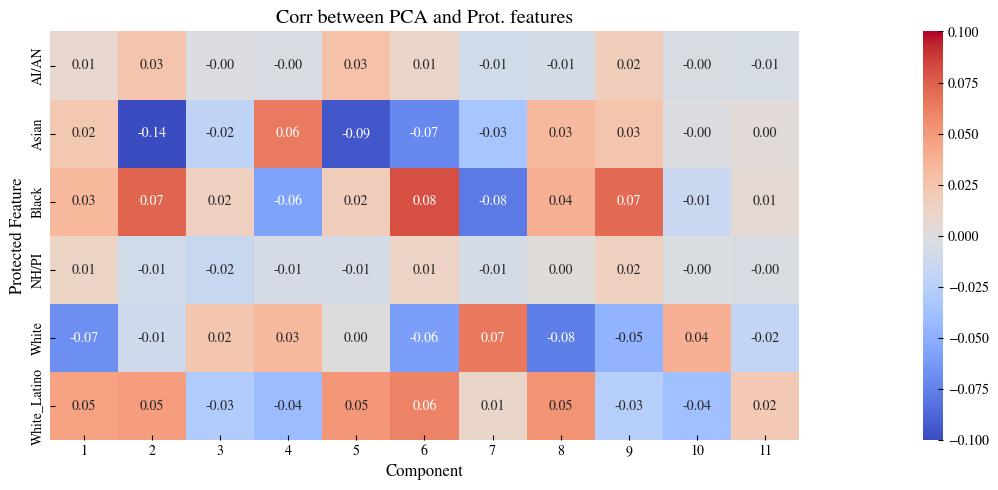

(395460, 6)


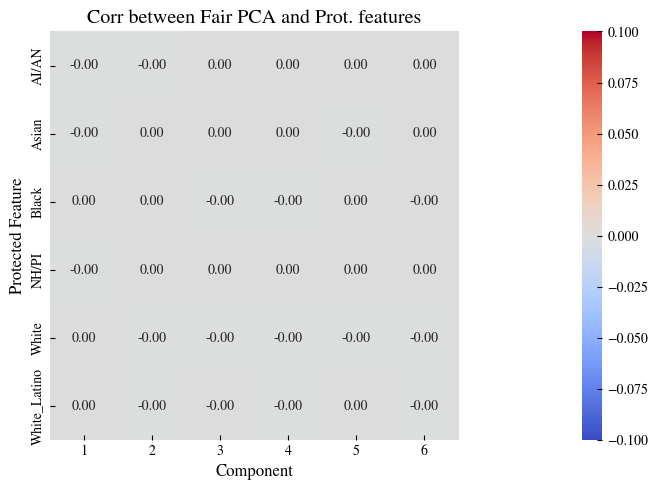

In [9]:
corr_plot(x_train_df, 'pearson', train_groups, n_components=11, fair=False)
corr_plot(x_train, 'pearson', train_groups, n_components=11, fair=True)

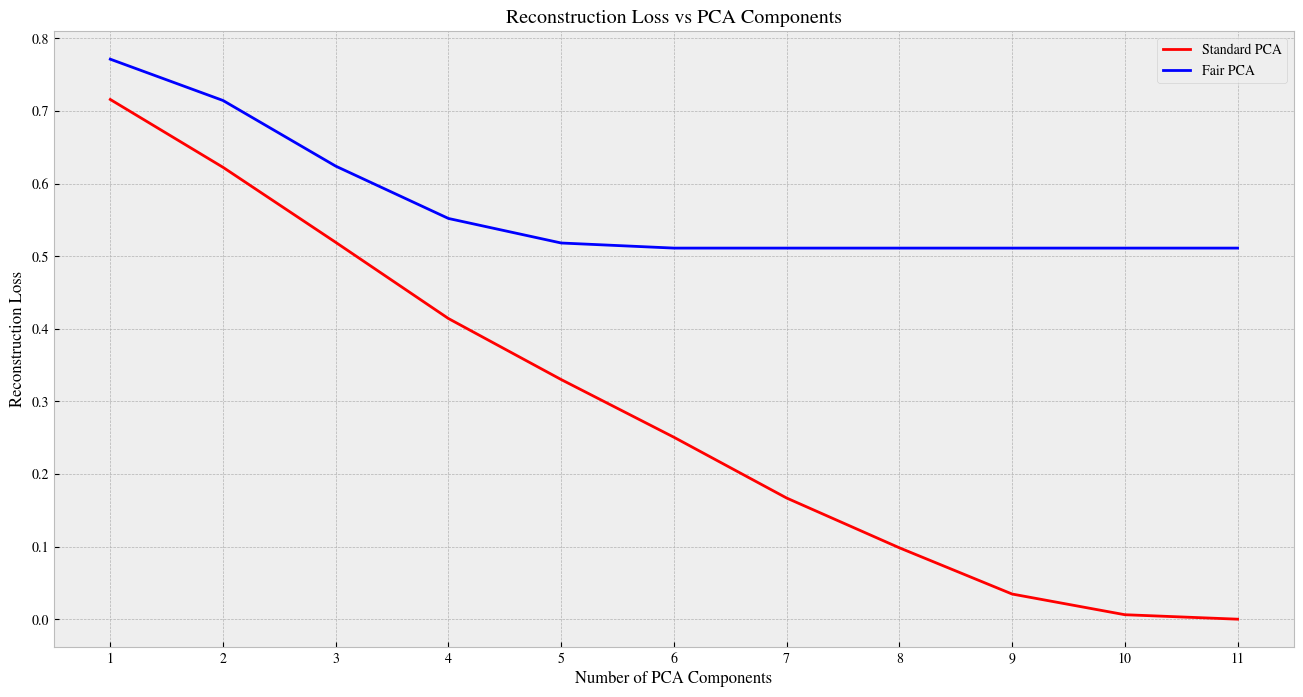

In [14]:
plot_reconstruction_loss(x_train_df, x_test_df, n_components=11, groups=train_groups)

# Explainability Analysis

In [ ]:
import pandas as pd
import shap
import torch
shap.initjs()

from LR_pt import LogisticRegression
from NN import SimpleNN

In [ ]:
data = data_loader(race_cols, num=100000, one_hot=True)
x_train, x_val, x_test, y_train, y_val , y_test, train_groups, val_groups, test_groups = preprocess(data, features, race_cols)
X = torch.from_numpy(x_test).float()
y = torch.from_numpy(np.array(y_test)).long().view(-1, 1)

X_fair_PCA, U, explained_variance = fair_PCA(x_train, n_components=x_train.shape[1], groups=train_groups)
x_test_pca = x_test @ U

## Loading models and inserting state

In [ ]:
# Loading logistic regression
# model_lr_state = torch.load("../old_models/LRmodel_S:1000000_E:1000_F:True_L:1_G:0.1.pt")
# model_lr = LogisticRegression(x_train.shape[1])
# model_lr.weights = model_lr_state['linear.weight']
# model_lr.bias = model_lr_state['linear.bias']

# Loading neural network
model_nn_state = torch.load("../models/NN_pca:False_E:50_lr:0.0001_bs:512.pt")
model_nn = SimpleNN(X.shape[1], 2)
model_nn.load_state_dict(model_nn_state)

# loading neural network with fair PCA
model_nn_fair_state = torch.load("../models/NN_pca:True_E:50_lr:0.0001_bs:512.pt")
model_nn_fair = SimpleNN(X_fair_PCA.shape[1], 2)
model_nn_fair.load_state_dict(model_nn_fair_state)

In [ ]:
#print(model_lr(X[0:10])) # 1st index
print(model_nn(X[0:10])) # 8th index
print(model_nn_fair(X_fair_PCA[0:10]))

## Logistic Regression - SHAP Analysis

In [ ]:
X_np = X.detach().numpy()
explainer = shap.Explainer(model_lr, X_np, feature_names=clean_features)
shap_values_lr = explainer(X_np)

In [ ]:
# Individual instance shap vals
shap.plots.force(shap_values_lr[1])

In [ ]:
## Overall shap vals
# mean SHAP value for each feature
#shap.plots.bar(shap_values_lr[:,:6])
shap.summary_plot(shap_values_lr, X, feature_names=clean_features, plot_type='bar')

# Beeswarm plot
#shap.plots.beeswarm(shap_values_lr[:,:6])
shap.summary_plot(shap_values_lr, X, feature_names=clean_features)

## Neural Network - SHAP Analysis

In [ ]:
X_sub = X[:1000]
explainer_nn = shap.DeepExplainer(model_nn, X_sub)
shap_values_nn = explainer_nn.shap_values(X_sub)

In [ ]:
model_nn(X_sub[:10])

In [ ]:
shap.force_plot(np.mean(y_test), shap_values_nn[1][0], feature_names=clean_features)

In [ ]:
shap.summary_plot(shap_values_nn[1], X_sub, feature_names=clean_features, plot_type='bar')
shap.summary_plot(shap_values_nn[1], X_sub, feature_names=clean_features)

## Neural Network FairPCA - SHAP Analysis

In [ ]:
model_nn_fair

In [ ]:
x_fair = torch.from_numpy(x_test_pca[:1000]).float()
explainer_fair = shap.DeepExplainer(model_nn_fair, x_fair)
shap_values_fair = explainer_fair.shap_values(x_fair)

In [ ]:
model_nn_fair(x_fair[0:10])

In [ ]:
shap.force_plot(np.mean(y_test), shap_values_fair[1][4])

In [ ]:
shap.summary_plot(shap_values_fair[1], x_fair, plot_type='bar')
shap.summary_plot(shap_values_fair[1], x_fair)